# Dogs vs Cats

In [1]:
# Basic imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2

# preprocessing and split
from sklearn.model_selection import train_test_split as split

# models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


# Scores and reports
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_roc_curve
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Make the data frame
def Makedf(file_names, color = cv2.IMREAD_COLOR):
    li = []
    la = []
    labels = ["cat", "dog"]
    for path in file_names:
        im = cv2.cvtColor(cv2.imread(path), color)
        im = cv2.resize(im,(64,64), interpolation=cv2.INTER_CUBIC)/255
        
        # we will flip each image and save also the fliped one
        im_flip = cv2.flip(im, 1)
        
        im = pd.Series(im.flatten())
        im_flip = pd.Series(im_flip.flatten())
        for j,label in enumerate(labels):
                if label in path[60:].lower():
                    la.append(j)
                    la.append(j)
        li.append(im)
        li.append(im_flip)

    frame = pd.concat(li, axis=1, ignore_index=True).T
    frame = frame.rename(columns=lambda s: 'pix ' + str(s), index=lambda s: 'img ' +str(s) )
    frame["Label"] = la
    return frame

# Prepare data and basic info:

In [3]:
# Make the data frame
Train_file = glob.glob(r'/Users/ortrabelsi/Desktop/מטלה דימות נתונים/סופי 1/dogs-vs-cats/train' + "/*")
Test_file = glob.glob(r'/Users/ortrabelsi/Desktop/מטלה דימות נתונים/סופי 1/dogs-vs-cats/test1'+ "/*")
frame = Makedf(Train_file)
frame

,pix 0,pix 1,pix 2,pix 3,pix 4,pix 5,pix 6,pix 7,pix 8,pix 9,...,pix 12279,pix 12280,pix 12281,pix 12282,pix 12283,pix 12284,pix 12285,pix 12286,pix 12287,Label
img 0,0.137255,0.070588,0.031373,0.290196,0.192157,0.129412,0.180392,0.094118,0.070588,0.325490,...,0.349020,0.215686,0.156863,0.333333,0.239216,0.176471,0.309804,0.215686,0.141176,1
img 1,0.917647,0.756863,0.658824,0.835294,0.678431,0.580392,0.741176,0.596078,0.474510,0.337255,...,0.243137,0.145098,0.105882,0.141176,0.086275,0.043137,0.231373,0.145098,0.109804,1
img 2,0.596078,0.439216,0.160784,0.643137,0.490196,0.156863,0.639216,0.501961,0.262745,0.658824,...,0.682353,0.505882,0.172549,0.250980,0.133333,0.000000,0.376471,0.231373,0.027451,0
img 3,0.768627,0.498039,0.101961,0.741176,0.611765,0.498039,0.811765,0.576471,0.203922,0.807843,...,0.360784,0.227451,0.058824,0.309804,0.207843,0.054902,0.250980,0.168627,0.047059,0
img 4,0.254902,0.219608,0.376471,0.650980,0.647059,0.650980,0.749020,0.745098,0.654902,0.760784,...,0.494118,0.317647,0.262745,0.435294,0.266667,0.207843,0.423529,0.266667,0.211765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
img 49995,0.517647,0.600000,0.603922,0.490196,0.580392,0.564706,0.541176,0.615686,0.611765,0.517647,...,0.603922,0.729412,0.741176,0.415686,0.600000,0.541176,0.509804,0.650980,0.611765,1
img 49996,0.541176,0.537255,0.482353,0.576471,0.572549,0.517647,0.556863,0.549020,0.505882,0.588235,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
img 49997,0.149020,0.133333,0.113725,0.164706,0.149020,0.129412,0.207843,0.196078,0.164706,0.588235,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
img 49998,0.337255,0.345098,0.349020,0.294118,0.301961,0.305882,0.282353,0.298039,0.301961,0.254902,...,0.349020,0.396078,0.396078,0.309804,0.345098,0.360784,0.168627,0.184314,0.203922,0


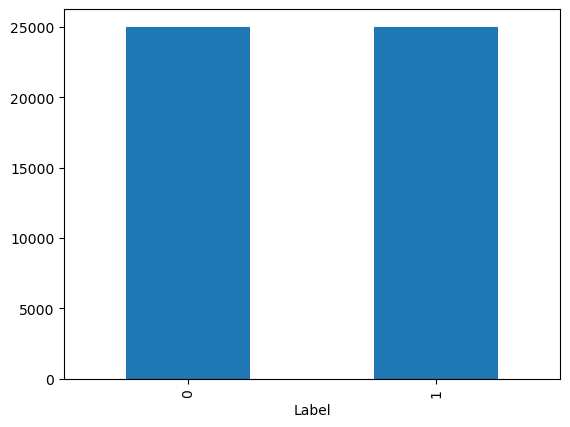

In [4]:
# Chack if the data is balanced 
Labels_count = frame.groupby('Label').count()['pix 0']
Labels_count.plot.bar()
plt.show()

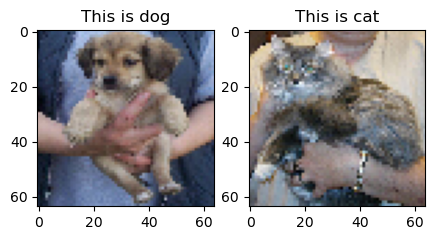

In [5]:
#Simpal images show:
f, ax = plt.subplots(1,2 , figsize = (5,5))
im_dog = (np.array(frame.drop('Label', axis=1).iloc[0]).reshape(64,64,3)*255).astype(np.uint8)
im_cat = (np.array(frame.drop('Label', axis=1).iloc[2530]).reshape(64,64,3)*255).astype(np.uint8)
im_dog = cv2.cvtColor(im_dog, cv2.COLOR_BGR2RGB)
im_cat = cv2.cvtColor(im_cat, cv2.COLOR_BGR2RGB)
ax[0].imshow(im_dog)
ax[0].set_title("This is {}".format('dog'))
ax[1].imshow(im_cat)
ax[1].set_title("This is {}".format('cat'))
plt.show()

In [6]:
print("The size of each image after reshape is: " + str(im_dog.shape))
print("and after flatten: " + str(len(im_dog.flatten())))

The size of each image after reshape is: (64, 64, 3)
and after flatten: 12288


# Modeling:

We will try xgboost and random forest with <u>all</u> of our data, xgboost will give us the best result.  
after that we will try to reduce dimension and see if the result is the same 

In [7]:
# Split Data
y = frame['Label']
X = frame.drop('Label', axis=1)

#split x and y to trin and test
x_train , x_test , y_train , y_test = split(X,y ,train_size = 0.8 , shuffle = True , random_state = 1)


In [8]:
# Random Forest
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [9]:
scores = []
RF_score = RF.score(x_test,y_test)
scores.append(RF_score)
RF_score

0.66

In [10]:
# xgboost
XG = XGBClassifier(n_estimators= 25, n_jobs=-1, learning_rate=0.4, seed=0)
XG.fit(x_train,y_train)

[20:15:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
XG_score = XG.score(x_test, y_test)
scores.append(XG_score)
XG_score

0.668

# Dimension Reduction

### We will try 2 ways to reduce dimensions :

## 1) PCA :

In [12]:
pca = PCA(n_components=0.95)
x_trin_new =  pca.fit_transform(x_train)
x_test_new = pca.transform(x_test)

In [13]:
print("Size befor PCA" + str(x_train.shape))
print("Size after PCA" + str(x_trin_new.shape))
print("This is only 11.8% from the data!! " )

Size befor PCA(40000, 12288)
Size after PCA(40000, 1454)
This is only 11.8% from the data!! 


In [14]:
# Random Forest
RF_pca = RandomForestClassifier()
RF_pca.fit(x_trin_new, y_train)

RandomForestClassifier()

In [15]:
RF_pca_score = RF_pca.score(x_test_new,y_test)
scores.append(RF_pca_score)
RF_pca_score

0.6107

In [16]:
# xgboost
XG_pca = XGBClassifier(n_estimators= 25, n_jobs=-1, learning_rate=0.4, seed=0)
XG_pca.fit(x_trin_new,y_train)

[20:36:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [17]:
XG_pca.score(x_test_new,y_test)
XG_pca_score = XG_pca.score(x_test_new,y_test)
scores.append(XG_pca_score)
XG_pca_score

0.6564

## 2) Convert images to gray  :

In [18]:
gray_frame = Makedf(Train_file, cv2.COLOR_RGB2GRAY)
gray_frame

,pix 0,pix 1,pix 2,pix 3,pix 4,pix 5,pix 6,pix 7,pix 8,pix 9,...,pix 4087,pix 4088,pix 4089,pix 4090,pix 4091,pix 4092,pix 4093,pix 4094,pix 4095,Label
img 0,0.086275,0.215686,0.117647,0.258824,0.231373,0.325490,0.317647,0.309804,0.317647,0.329412,...,0.239216,0.164706,0.141176,0.160784,0.188235,0.235294,0.247059,0.258824,0.235294,1
img 1,0.792157,0.713725,0.627451,0.270588,0.313725,0.325490,0.266667,0.333333,0.298039,0.313725,...,0.435294,0.435294,0.403922,0.360784,0.294118,0.172549,0.172549,0.098039,0.164706,1
img 2,0.454902,0.498039,0.513725,0.521569,0.529412,0.533333,0.533333,0.529412,0.549020,0.545098,...,0.474510,0.619608,0.560784,0.576471,0.584314,0.549020,0.521569,0.152941,0.250980,0
img 3,0.533333,0.639216,0.603922,0.615686,0.686275,0.627451,0.639216,0.729412,0.654902,0.635294,...,0.450980,0.419608,0.419608,0.392157,0.345098,0.301961,0.247059,0.223529,0.180392,0
img 4,0.247059,0.650980,0.737255,0.729412,0.756863,0.654902,0.572549,0.607843,0.596078,0.803922,...,0.454902,0.470588,0.407843,0.407843,0.384314,0.380392,0.364706,0.309804,0.305882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
img 49995,0.576471,0.549020,0.592157,0.568627,0.607843,0.572549,0.658824,0.600000,0.678431,0.662745,...,0.415686,0.400000,0.545098,0.552941,0.525490,0.478431,0.694118,0.537255,0.603922,1
img 49996,0.533333,0.568627,0.545098,0.576471,0.592157,0.611765,0.623529,0.639216,0.662745,0.658824,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
img 49997,0.137255,0.152941,0.196078,0.580392,0.596078,0.603922,0.619608,0.639216,0.643137,0.658824,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0
img 49998,0.345098,0.301961,0.294118,0.266667,0.247059,0.223529,0.203922,0.196078,0.227451,0.164706,...,0.517647,0.486275,0.737255,0.807843,0.607843,0.376471,0.380392,0.337255,0.180392,0


In [19]:
# Split Data
y_gray = gray_frame['Label']
X_gray = gray_frame.drop('Label', axis=1)

#split x and y to trin and test
x_gray_train , x_gray_test , y_gray_train , y_gray_test = split(X_gray,y_gray ,train_size = 0.8 , shuffle = True , random_state = 1)

In [20]:
# Random Forest
RF_gray = RandomForestClassifier()
RF_gray.fit(x_gray_train,y_gray_train)

RandomForestClassifier()

In [21]:
RF_gray_score = RF_gray.score(x_gray_test,y_gray_test)
scores.append(RF_gray_score)
RF_gray_score

0.6489

In [22]:
# xgboost
XG_gray = XGBClassifier(n_estimators= 25, n_jobs=-1, learning_rate=0.4, seed=0)
XG_gray.fit(x_gray_train,y_gray_train)

[20:41:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=25, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [23]:
XG_gray_score = XG_gray.score(x_gray_test,y_gray_test)
scores.append(XG_gray_score)
XG_gray_score

0.6466

# conclusion and result

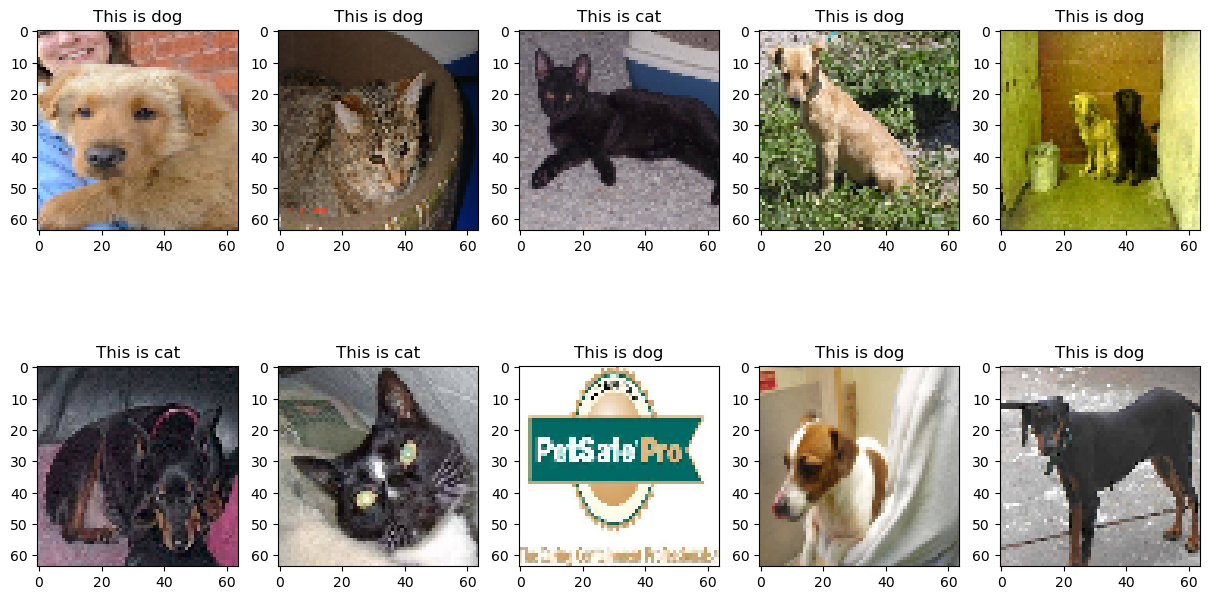

In [24]:
classes = {0: 'cat',
           1: 'dog'
          }

f, ax = plt.subplots(2,5 , figsize = (15,8))
for i,j in enumerate(np.random.randint(0, len(x_test), 10)) :
    image = x_test[j:j+1]
    image_class = classes[XG.predict(image)[0]]
    image = (np.array(image).reshape(64,64,3)*255).astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax[i//5, i%5].imshow(image)
    ax[i//5, i%5].set_title("This is {}".format(image_class))
    
plt.show()